# Data Science Boot Camp Project 1

## (1) Reading Input Data from Files

In [1]:
import numpy as np
import pandas as pd

In [2]:
#imports
import os
import json
import pyprind

#defining function load_mojo_data
#which will read all data files and return list of dictionaries
#each dictionary = info for one movie
def load_mojo_data(baseDirectory = "C:\Work\Training\DSBootCamp\Git\ct16_cap1_ds5\project_1"):
    """
       Output: List of Dictionary of Movie
    """
    try:
        import numpy as np
        print "Start Loading MOJO DATA:"
        DATA_DIR = os.path.join(baseDirectory,'data', 'boxofficemojo')

        DataFileList = [dataFileName for dataFileName in os.listdir(DATA_DIR) if ".json" in dataFileName ]
        MovieInfoList = []

        n = len(DataFileList)
        bar = pyprind.ProgBar(n, bar_char='X')

        i = 0
        for dataFileName in DataFileList:
            i+=1
            target_file_path = os.path.join(DATA_DIR, dataFileName)
            with open(target_file_path, 'r') as target_file:
                movie = json.load(target_file)


                if type(movie) is not dict:
                    continue
                columnNames = ["alt_title", "director", "domestic_gross", "mojo_slug", "opening_per_theater", \
                               "opening_weekend_take", "production_budget", "release_date_limited", \
                               "release_date_wide", "title", "widest_release", "worldwide_gross", "year"]
                for columnName in columnNames:
                    if columnName not in movie:
                        movie[columnName] = np.nan

                MovieInfoList.append(movie)
            bar.update(item_id = i)
        print "Finish Loading MOJO DATA:"
        return MovieInfoList
    except Exception as ex:
        print "Error loading MOJO data: " + " ".join([str(x) for x in ex.args])
        raise(ex)

def load_critic_data(baseDirectory = "C:\Work\Training\DSBootCamp\Git\ct16_cap1_ds5\project_1"):
    """
       Output: List of Dictionary of Movie
    """
    import numpy as np
    try:
        print "Start Loading CRITIC DATA:"
        DATA_DIR = os.path.join(baseDirectory,'data', 'metacritic')

        DataFileList = [dataFileName for dataFileName in os.listdir(DATA_DIR) if ".json" in dataFileName ]
        CriticInfoList = []

        n = len(DataFileList)
        bar = pyprind.ProgBar(n, bar_char='X')

        i = 0
        for dataFileName in DataFileList:
            i+=1
            target_file_path = os.path.join(DATA_DIR, dataFileName)
            with open(target_file_path, 'r') as target_file:
                critic = json.load(target_file)
                if type(critic) is not dict:
                    continue
                columnNames = ["complete", "director", "genre", "metacritic_page", "metascore", \
                               "num_critic_reviews", "num_user_ratings", "num_user_reviews", \
                               "rating", "release_date", "runtime_minutes", "studio", \
                               "title", "user_score", "year"]
                for columnName in columnNames:
                    if columnName not in critic:
                        critic[columnName] = np.nan
                CriticInfoList.append(critic)
            bar.update(item_id = i)
        print "Finish Loading CRITIC DATA:"
        return CriticInfoList
    except Exception as ex:
        print "Error loading CRITIC data: " + " ".join([str(x) for x in ex.args])
        raise(ex)

### (1.2) Reading in Movie Data

In [3]:
movie_dicts = load_mojo_data()
movie_df_raw = pd.DataFrame(movie_dicts)

print movie_df_raw.head(5)
print movie_df_raw.shape

0%                          100%
[X                             ] | ETA[sec]: 4.554 | Item ID: 125

Start Loading MOJO DATA:


[XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX] | ETA[sec]: 0.000 | Item ID: 3728

Finish Loading MOJO DATA:
                           alt_title         director  domestic_gross  \
0                 10,000 B.C. (2008)  Roland Emmerich      94784201.0   
1              102 Dalmatians (2000)             None      66957026.0   
2  10 Things I Hate About You (1999)             None      38178166.0   
3                    10 Years (2012)     Jamie Linden        203373.0   
4                  11 Flowers (2013)             None          9213.0   

               mojo_slug  opening_per_theater  opening_weekend_take  \
0                10000bc              10518.0            35867488.0   
1          102dalmatians               7353.0            19883351.0   
2  10thingsihateaboutyou               3668.0             8330681.0   
3                10years               7569.0               22707.0   
4              11flowers               1758.0                3516.0   

   production_budget release_date_limited release_date_wide  \
0        105000000.0                 None    


Total time elapsed: 20.188 sec


### (1.3) Checking Missing Values in Movie Data

In [4]:
print movie_df_raw.shape
print movie_df_raw.isnull().sum()

(3728, 13)
alt_title                  0
director                1556
domestic_gross            75
mojo_slug                  0
opening_per_theater      180
opening_weekend_take     180
production_budget       2137
release_date_limited    3435
release_date_wide         10
title                      0
widest_release           152
worldwide_gross          907
year                       7
dtype: int64


### (1.4) Reading in Critic Data

In [5]:
critic_dicts = load_critic_data()
critic_df_raw = pd.DataFrame(critic_dicts)

print critic_df_raw.head(5)
print critic_df_raw.shape

0%                          100%
[                              ]

Start Loading CRITIC DATA:


[XXXXXXXXXXXXXXXXXXXXXXXXXXXXX ] | ETA[sec]: 3.550 | Item ID: 4610

Finish Loading CRITIC DATA:
  complete         director                        genre  \
0     True       Gil Junger            [Comedy, Romance]   
1     True     Jamie Linden     [Drama, Comedy, Romance]   
2     True  Roland Emmerich  [Adventure, Drama, Fantasy]   
3     True    Stephen Herek  [Adventure, Comedy, Family]   
4     True       Kevin Lima             [Comedy, Family]   

                     metacritic_page  metascore num_critic_reviews  \
0  /movie/10-things-i-hate-about-you       70.0     [18, 7, 1, 26]   
1                    /movie/10-years       61.0     [7, 11, 0, 18]   
2                    /movie/10000-bc       34.0     [4, 8, 17, 29]   
3              /movie/101-dalmatians       49.0      [8, 9, 3, 20]   
4              /movie/102-dalmatians       35.0     [7, 5, 12, 24]   

   num_user_ratings   num_user_reviews rating release_date  runtime_minutes  \
0             175.0     [27, 1, 1, 29]  PG-13   1999-03-31             97.0   
1              12.0       [3, 2,

### (1.5) Checking Missing Value in Critic Data

In [6]:
print critic_df_raw.shape
print critic_df_raw.isnull().sum()

(4765, 16)
complete                 2
director                 2
genre                    2
metacritic_page          2
metascore              177
num_critic_reviews       2
num_user_ratings       284
num_user_reviews         2
rating                   2
release_date             2
runtime_minutes         97
studio                  40
title                    2
unable to retrieve    4763
user_score               2
year                     2
dtype: int64


### (1.6) Clean up Title Information to both data Set
####      -  Removing white spaces
####      -  Convert to lower case

In [7]:
movie_df_raw['scrubbed_title'] = movie_df_raw['title']
movie_df_raw['scrubbed_title'] = movie_df_raw['scrubbed_title'].str.replace('[^\w]','')
movie_df_raw['scrubbed_title'] = movie_df_raw['scrubbed_title'].str.lower()

critic_df_raw['scrubbed_title'] = critic_df_raw['title']
critic_df_raw['scrubbed_title'] = critic_df_raw['scrubbed_title'].str.replace('[^\w]','')
critic_df_raw['scrubbed_title'] = critic_df_raw['scrubbed_title'].str.lower()

### (1.7) Joining movie and critic data sets into rawData set

In [8]:
rawDataDF = movie_df_raw.merge(critic_df_raw, how = 'inner', on = ["year", "scrubbed_title"])

In [9]:
print rawDataDF.head(5)

                           alt_title       director_x  domestic_gross  \
0                 10,000 B.C. (2008)  Roland Emmerich      94784201.0   
1              102 Dalmatians (2000)             None      66957026.0   
2  10 Things I Hate About You (1999)             None      38178166.0   
3                    10 Years (2012)     Jamie Linden        203373.0   
4                  11 Flowers (2013)             None          9213.0   

               mojo_slug  opening_per_theater  opening_weekend_take  \
0                10000bc              10518.0            35867488.0   
1          102dalmatians               7353.0            19883351.0   
2  10thingsihateaboutyou               3668.0             8330681.0   
3                10years               7569.0               22707.0   
4              11flowers               1758.0                3516.0   

   production_budget release_date_limited release_date_wide  \
0        105000000.0                 None        2008-03-07   
1       

### (1.8) Checking Missing Value information in raw Data

In [10]:
print rawDataDF.shape

print rawDataDF.isnull().sum()

(3347, 29)
alt_title                  0
director_x              1321
domestic_gross            42
mojo_slug                  0
opening_per_theater      105
opening_weekend_take     105
production_budget       1840
release_date_limited    3073
release_date_wide          3
title_x                    0
widest_release            80
worldwide_gross          720
year                       0
scrubbed_title             0
complete                   0
director_y                 0
genre                      0
metacritic_page            0
metascore                 76
num_critic_reviews         0
num_user_ratings         141
num_user_reviews           0
rating                     0
release_date               0
runtime_minutes           53
studio                    18
title_y                    0
unable to retrieve      3347
user_score                 0
dtype: int64


In [27]:
colList = [col for col in rawDataDF.columns if col not in ["alt_title", "director_x"]]
rawDataDF.to_csv("C:/Work/Training/DSBootCamp/Project/DSBootcamp_ProjectW1/rawData.csv", \
                                 sep="|", header=True, index = False, encoding = "utf-8")

## (2) Data Clean up

### Select only columns that we need

In [245]:
#"production_budget"
colList = ["domestic_gross", "opening_per_theater", "opening_weekend_take", \
"release_date_wide", "title_x","widest_release","year",\
"scrubbed_title","complete","director_y","genre", \
"metascore","num_critic_reviews","num_user_reviews", \
"rating","release_date","runtime_minutes", \
"studio","user_score"]

cleanDataDF = rawDataDF[colList]

print cleanDataDF.shape
print cleanDataDF.head(5)

(3347, 19)
   domestic_gross  opening_per_theater  opening_weekend_take  \
0      94784201.0              10518.0            35867488.0   
1      66957026.0               7353.0            19883351.0   
2      38178166.0               3668.0             8330681.0   
3        203373.0               7569.0               22707.0   
4          9213.0               1758.0                3516.0   

  release_date_wide                     title_x  widest_release    year  \
0        2008-03-07                 10,000 B.C.          3454.0  2008.0   
1        2000-11-22             102 Dalmatians           2704.0  2000.0   
2        1999-03-31  10 Things I Hate About You          2311.0  1999.0   
3        2012-09-14                    10 Years            63.0  2012.0   
4        2013-02-22                 11 Flowers              2.0  2013.0   

          scrubbed_title complete       director_y  \
0                10000bc     True  Roland Emmerich   
1          102dalmatians     True       Kevin

### Remove Missing Values from Targets and selected columns

In [246]:
#, "production_budget"
cleanDataDF.dropna(subset = ["domestic_gross", "opening_per_theater", "opening_weekend_take"], inplace=True)

print cleanDataDF.shape

(3242, 19)


C:\Users\vrk801\AppData\Local\Continuum\Anaconda2-64\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Check Missing Value Information

In [247]:
print cleanDataDF.isnull().sum()

domestic_gross           0
opening_per_theater      0
opening_weekend_take     0
release_date_wide        2
title_x                  0
widest_release          11
year                     0
scrubbed_title           0
complete                 0
director_y               0
genre                    0
metascore               64
num_critic_reviews       0
num_user_reviews         0
rating                   0
release_date             0
runtime_minutes         48
studio                  18
user_score               0
dtype: int64


## Clean Data for Domestic Gross Prediction

In [248]:
#"production_budget",
colList = ["domestic_gross", "opening_per_theater", "opening_weekend_take", \
"release_date_wide", "widest_release","year",\
"scrubbed_title","director_y","genre", \
"rating","release_date","runtime_minutes", "metascore", \
"studio"]


gross_model_data_df = cleanDataDF[colList]
gross_model_data_df.dropna(inplace = True)

print gross_model_data_df.shape

print gross_model_data_df.head(5)

(3117, 14)
   domestic_gross  opening_per_theater  opening_weekend_take  \
0      94784201.0              10518.0            35867488.0   
1      66957026.0               7353.0            19883351.0   
2      38178166.0               3668.0             8330681.0   
3        203373.0               7569.0               22707.0   
4          9213.0               1758.0                3516.0   

  release_date_wide  widest_release    year         scrubbed_title  \
0        2008-03-07          3454.0  2008.0                10000bc   
1        2000-11-22          2704.0  2000.0          102dalmatians   
2        1999-03-31          2311.0  1999.0  10thingsihateaboutyou   
3        2012-09-14            63.0  2012.0                10years   
4        2013-02-22             2.0  2013.0              11flowers   

        director_y                        genre     rating release_date  \
0  Roland Emmerich  [Adventure, Drama, Fantasy]      PG-13   2008-03-07   
1       Kevin Lima             [C

C:\Users\vrk801\AppData\Local\Continuum\Anaconda2-64\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [249]:
print gross_model_data_df.isnull().sum()

domestic_gross          0
opening_per_theater     0
opening_weekend_take    0
release_date_wide       0
widest_release          0
year                    0
scrubbed_title          0
director_y              0
genre                   0
rating                  0
release_date            0
runtime_minutes         0
metascore               0
studio                  0
dtype: int64


### Create Movie Type Flags

In [250]:
import numpy as np

Genre_List = gross_model_data_df.genre.tolist()

Genre = []
for element in Genre_List:
    Genre.extend(element)
    
GenreUnique = list(set(Genre))

print GenreUnique

print len(GenreUnique)

for movieType in GenreUnique:
    gross_model_data_df[movieType] = 0

for idx in gross_model_data_df.index:
    for colName in gross_model_data_df.ix[idx]['genre']:
        gross_model_data_df.set_value(idx, colName, 1)

[u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', u'Western', u'News', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Documentary', u'Musical', u'History', u'Family', u'Fantasy', u'Sport', u'Biography']
23


C:\Users\vrk801\AppData\Local\Continuum\Anaconda2-64\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Convert Column to Date

In [251]:
gross_model_data_df["release_date_wide"] = pd.to_datetime(gross_model_data_df["release_date_wide"], format="%Y-%m-%d")

C:\Users\vrk801\AppData\Local\Continuum\Anaconda2-64\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### Extracting Month Information from Release Date Wide

In [252]:
gross_model_data_df["release_month"] = gross_model_data_df["release_date_wide"].dt.month

C:\Users\vrk801\AppData\Local\Continuum\Anaconda2-64\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [294]:
monthDF = pd.get_dummies(gross_model_data_df["release_month"].astype(str), prefix = "month", prefix_sep= "_")
print monthDF

      month_1  month_10  month_11  month_12  month_2  month_3  month_4  \
0         0.0       0.0       0.0       0.0      0.0      1.0      0.0   
1         0.0       0.0       1.0       0.0      0.0      0.0      0.0   
2         0.0       0.0       0.0       0.0      0.0      1.0      0.0   
3         0.0       0.0       0.0       0.0      0.0      0.0      0.0   
4         0.0       0.0       0.0       0.0      1.0      0.0      0.0   
5         0.0       0.0       0.0       0.0      0.0      0.0      0.0   
6         1.0       0.0       0.0       0.0      0.0      0.0      0.0   
7         0.0       0.0       0.0       0.0      0.0      1.0      0.0   
8         0.0       0.0       0.0       0.0      0.0      0.0      1.0   
9         0.0       0.0       0.0       0.0      0.0      0.0      1.0   
10        0.0       0.0       0.0       0.0      0.0      0.0      1.0   
11        0.0       0.0       0.0       0.0      0.0      0.0      0.0   
12        0.0       0.0       0.0     

### Extracting Quarter Information from Release Date Wide

In [253]:
gross_model_data_df["release_quarter"] = gross_model_data_df["release_month"]//4 + 1

C:\Users\vrk801\AppData\Local\Continuum\Anaconda2-64\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [293]:
quarterDF = pd.get_dummies(gross_model_data_df["release_quarter"].astype(str), prefix = "quarter", prefix_sep= "_")
print quarterDF

      quarter_1  quarter_2  quarter_3  quarter_4
0           1.0        0.0        0.0        0.0
1           0.0        0.0        1.0        0.0
2           1.0        0.0        0.0        0.0
3           0.0        0.0        1.0        0.0
4           1.0        0.0        0.0        0.0
5           0.0        0.0        1.0        0.0
6           1.0        0.0        0.0        0.0
7           1.0        0.0        0.0        0.0
8           0.0        1.0        0.0        0.0
9           0.0        1.0        0.0        0.0
10          0.0        1.0        0.0        0.0
11          0.0        0.0        1.0        0.0
12          0.0        1.0        0.0        0.0
13          0.0        1.0        0.0        0.0
14          1.0        0.0        0.0        0.0
15          0.0        1.0        0.0        0.0
17          0.0        0.0        1.0        0.0
18          0.0        0.0        1.0        0.0
19          0.0        0.0        1.0        0.0
20          0.0     

### Create Title_Length Variable

In [254]:
gross_model_data_df["title_length"] = gross_model_data_df["scrubbed_title"].str.len()

C:\Users\vrk801\AppData\Local\Continuum\Anaconda2-64\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [280]:
print gross_model_data_df.shape
print gross_model_data_df.columns

(3117, 40)
Index([      u'domestic_gross',  u'opening_per_theater',
       u'opening_weekend_take',    u'release_date_wide',
             u'widest_release',                 u'year',
             u'scrubbed_title',           u'director_y',
                      u'genre',               u'rating',
               u'release_date',      u'runtime_minutes',
                  u'metascore',               u'studio',
                     u'Sci-Fi',                u'Crime',
                    u'Romance',            u'Animation',
                      u'Music',                u'Adult',
                     u'Comedy',                  u'War',
                     u'Horror',              u'Western',
                       u'News',             u'Thriller',
                  u'Adventure',              u'Mystery',
                      u'Drama',               u'Action',
                u'Documentary',              u'Musical',
                    u'History',               u'Family',
                    

### Creating Rating Dummy Variables

In [256]:
ratingDF = pd.get_dummies(gross_model_data_df[["rating"]])
print ratingDF

      rating_  rating_G  rating_NC-17  rating_Not Rated  rating_Open  \
0         0.0       0.0           0.0               0.0          0.0   
1         0.0       1.0           0.0               0.0          0.0   
2         0.0       0.0           0.0               0.0          0.0   
3         0.0       0.0           0.0               0.0          0.0   
4         0.0       0.0           0.0               1.0          0.0   
5         0.0       0.0           0.0               0.0          0.0   
6         0.0       0.0           0.0               0.0          0.0   
7         0.0       0.0           0.0               0.0          0.0   
8         0.0       0.0           0.0               0.0          0.0   
9         0.0       0.0           0.0               0.0          0.0   
10        0.0       0.0           0.0               0.0          0.0   
11        0.0       0.0           0.0               0.0          0.0   
12        0.0       0.0           0.0               1.0         

### Select All Columns used for Gross Predictive Model and Remove all other unrelated columns

In [281]:
#"production_budget", 
colNames = [u'domestic_gross',  u'opening_per_theater', u'opening_weekend_take',
            u'widest_release',  u'year', u'runtime_minutes', u'Sci-Fi',
                      u'Crime',              u'Romance',
                  u'Animation',                u'Music',
                      u'Adult',               u'Comedy',
                        u'War',               u'Horror',
                    u'Western',               u'News',  
                   u'Thriller',            u'Adventure',
                    u'Mystery',                u'Drama',
                     u'Action',          u'Documentary',
                    u'Musical',              u'History',
                     u'Family',              u'Fantasy',
                      u'Sport',            u'Biography',
              u'release_month',      u'release_quarter',
               u'title_length', "metascore"]

gross_model_data_real_df = gross_model_data_df[colNames]

### Join Gross Predictive Model Data with Rating Dataframe to generate final data before prediction

In [258]:
gross_model_data_real_df = pd.concat([gross_model_data_real_df, ratingDF], axis=1)

In [313]:
gross_model_data_real_lm_df = pd.concat([gross_model_data_real_df, ratingDF, monthDF, quarterDF], axis=1)
gross_model_data_real_lm_df = gross_model_data_real_lm_df[[col for col in gross_model_data_real_lm_df.columns if col not in ["release_month", "release_quarter"]]]

In [314]:
print gross_model_data_real_df.shape
print gross_model_data_real_lm_df.shape

(3117, 33)
(3117, 63)


## (3) Data Exploration

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid', context = 'notebook')

### Matrix Scatter Plots

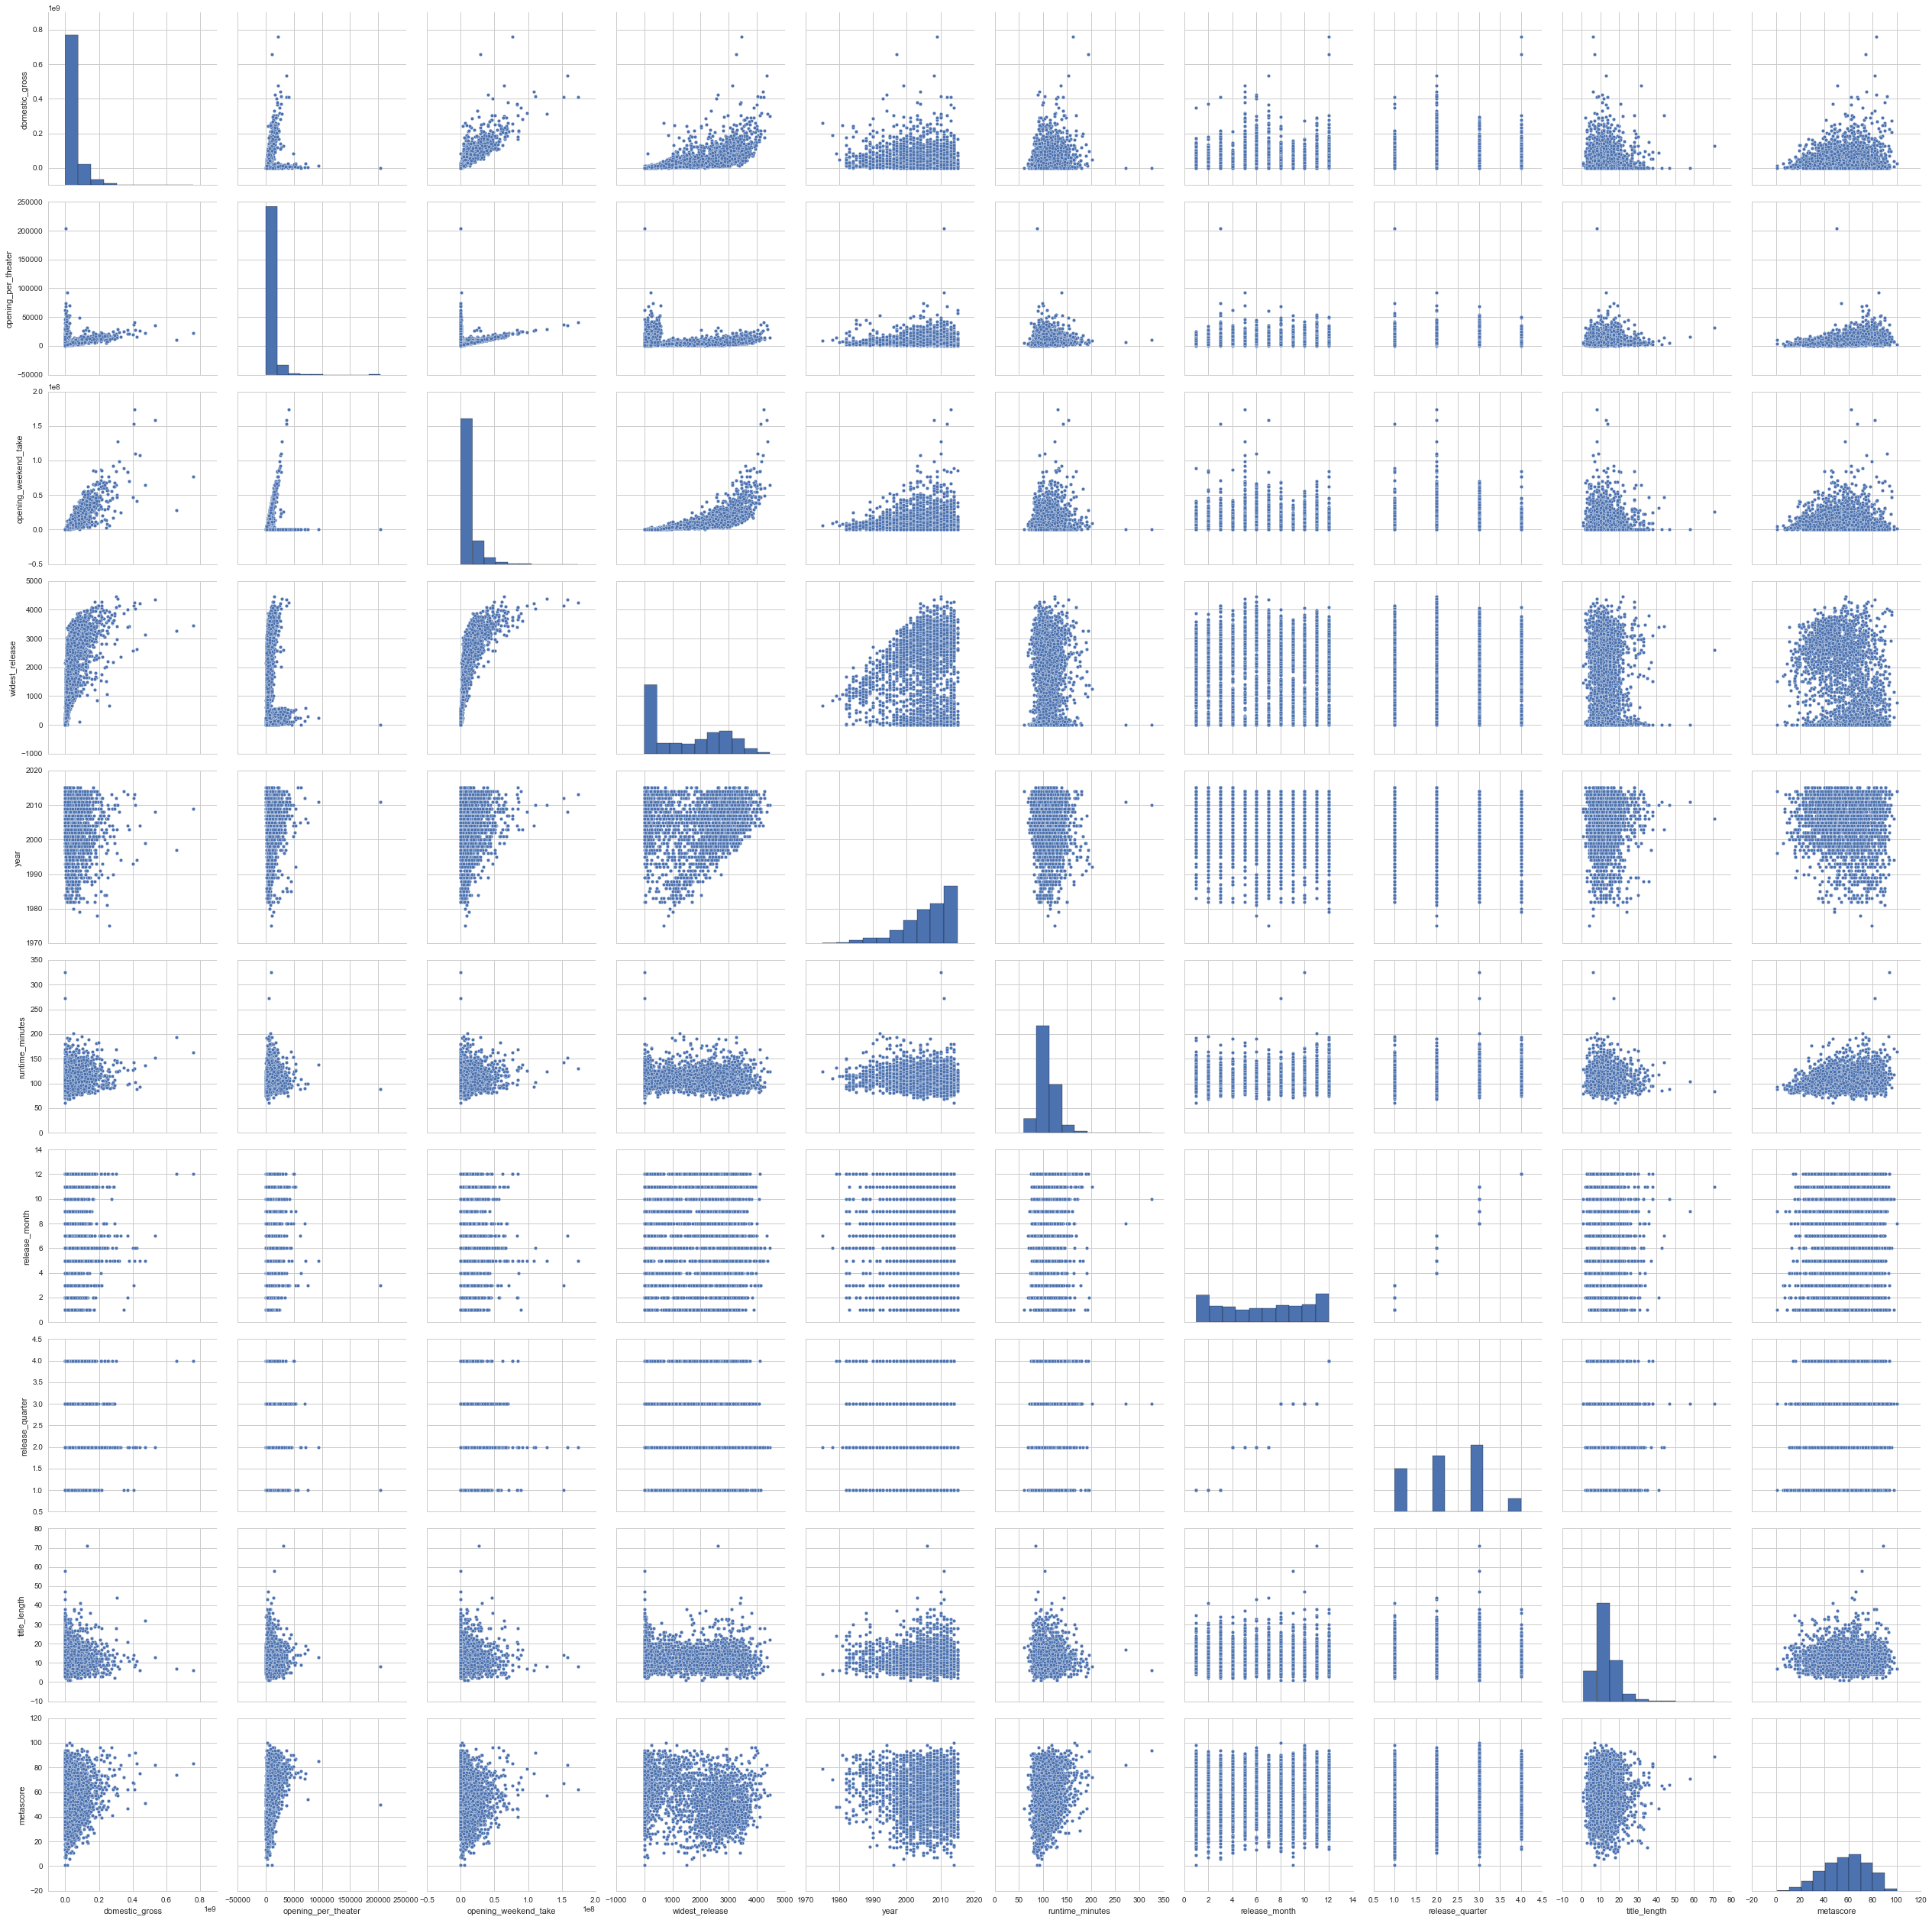

In [316]:
#"production_budget", 
cols = [u'domestic_gross',  u'opening_per_theater', u'opening_weekend_take',
            u'widest_release',  u'year', u'runtime_minutes', 
              u'release_month',      u'release_quarter',
               u'title_length', "metascore"]

sns.pairplot(gross_model_data_real_df[cols], size=3.5)

### Correlation Matrix

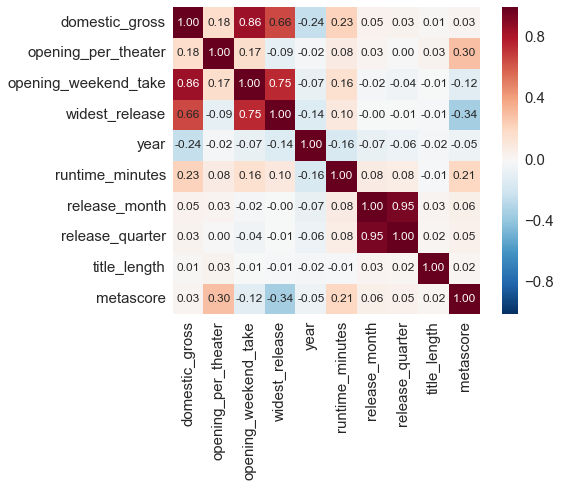

In [370]:
#"production_budget", 
cols = [u'domestic_gross',  u'opening_per_theater', u'opening_weekend_take',
            u'widest_release',  u'year', u'runtime_minutes', 
              u'release_month',      u'release_quarter',
               u'title_length', "metascore"]

import numpy as np
cm = np.corrcoef(gross_model_data_real_df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 12},
                yticklabels=cols,
                xticklabels=cols)

## (4) Linear Regression Model Building Predicting Gross (Long Term Model)

## (5) Linear Regression Model Building Predicting Gross (Short Term Model)

Predicting Domestic gross based on openning weekend sale and what => movie info and when => month that movie is released and who => director

In [450]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [451]:
ignoreList = ["title_length", "metascore"]
ignoreList2 = []
#ignoreList2 = [u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', 
#               u'Western', u'News', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Documentary', 
#               u'Musical', u'History', u'Family', u'Fantasy', u'Sport', u'Biography']
predictorNameList = [col for col in gross_model_data_real_lm_df.columns if (col not in ["domestic_gross"] + ignoreList + ignoreList2) and "month_" not in col and "quarter_" not in col and "rating_" not in col] 
y = gross_model_data_real_lm_df["domestic_gross"].values
X = gross_model_data_real_lm_df[predictorNameList].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12345)

print X_train.shape
print X_test.shape

(2181L, 28L)
(936L, 28L)


In [452]:
print predictorNameList

[u'opening_per_theater', u'opening_weekend_take', u'widest_release', u'year', u'runtime_minutes', u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', u'Western', u'News', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Documentary', u'Musical', u'History', u'Family', u'Fantasy', u'Sport', u'Biography']


In [453]:
lmodel_gross = LinearRegression()
lmodel_gross.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [454]:
y_train_pred = lmodel_gross.predict(X_train)
y_test_pred = lmodel_gross.predict(X_test)
print "MSE (Train) = %f" % mean_squared_error(y_train_pred, y_train)
print "R2 (Train) = %f" % r2_score(y_train_pred, y_train)

print "MSE (Test) = %f" % mean_squared_error(y_test_pred, y_test)
print "R2 (Test) = %f" % r2_score(y_test_pred, y_test)

MSE (Train) = 845097663559205.750000
R2 (Train) = 0.701159
MSE (Test) = 512547332365409.500000
R2 (Test) = 0.785517


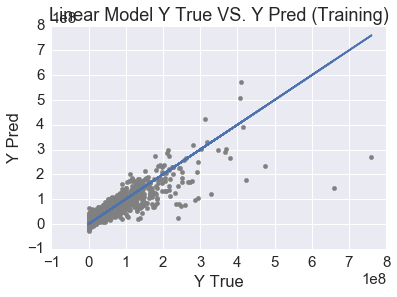

In [455]:
plt.scatter(y_train, y_train_pred, color='gray')
plt.plot(y_train, y_train)
plt.title("Linear Model Y True VS. Y Pred (Training)")
plt.xlabel("Y True")
plt.ylabel("Y Pred")

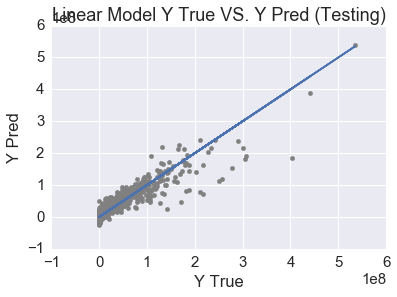

In [456]:
plt.scatter(y_test, y_test_pred, color='gray')
plt.plot(y_test, y_test)
plt.title("Linear Model Y True VS. Y Pred (Testing)")
plt.xlabel("Y True")
plt.ylabel("Y Pred")

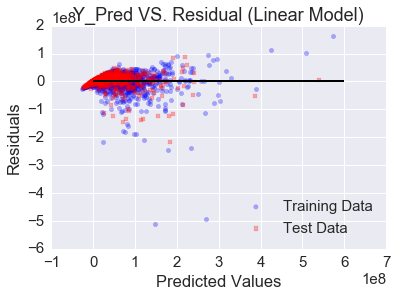

In [457]:
plt.scatter(y_train_pred, y_train_pred - y_train, color="b", marker="o", label="Training Data", alpha=0.3)
plt.scatter(y_test_pred, y_test_pred - y_test, color="r", marker="s", label="Test Data", alpha=0.3)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="lower right")
plt.hlines(y=0, xmin=0, xmax=600000000, lw=2, color="k")
plt.title("Y_Pred VS. Residual (Linear Model)")

In [458]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [459]:
ignoreList = ["title_length", "metascore", "release_month", "release_quarter"]
ignoreList2 = []
#ignoreList2 = [u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', 
#               u'Western', u'News', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Documentary', 
#               u'Musical', u'History', u'Family', u'Fantasy', u'Sport', u'Biography']
predictorNameList = [col for col in gross_model_data_real_df.columns if (col not in ["domestic_gross"] + ignoreList + ignoreList2) and "month_" not in col and "quarter_" not in col and "rating_" not in col]
y = gross_model_data_real_df["domestic_gross"].values
X = gross_model_data_real_df[predictorNameList].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12345)

print X_train.shape
print X_test.shape

(2181L, 28L)
(936L, 28L)


In [460]:
print predictorNameList

[u'opening_per_theater', u'opening_weekend_take', u'widest_release', u'year', u'runtime_minutes', u'Sci-Fi', u'Crime', u'Romance', u'Animation', u'Music', u'Adult', u'Comedy', u'War', u'Horror', u'Western', u'News', u'Thriller', u'Adventure', u'Mystery', u'Drama', u'Action', u'Documentary', u'Musical', u'History', u'Family', u'Fantasy', u'Sport', u'Biography']


In [461]:
rfmodel_gross = RandomForestRegressor(n_estimators=100, max_depth=10)
rfmodel_gross.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [462]:
y_train_pred = rfmodel_gross.predict(X_train)
y_test_pred = rfmodel_gross.predict(X_test)
print "MSE (Train) = %f" % mean_squared_error(y_train_pred, y_train)
print "R2 (Train) = %f" % r2_score(y_train_pred, y_train)

print "MSE (Test) = %f" % mean_squared_error(y_test_pred, y_test)
print "R2 (Test) = %f" % r2_score(y_test_pred, y_test)

MSE (Train) = 135943494390087.421875
R2 (Train) = 0.957939
MSE (Test) = 409580895187317.000000
R2 (Test) = 0.836224


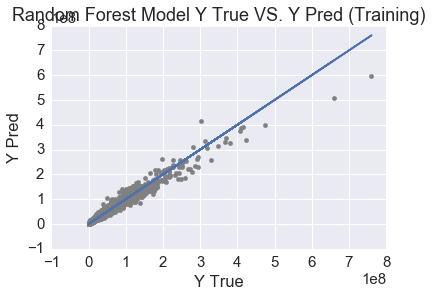

In [463]:
plt.scatter(y_train, y_train_pred, color='gray')
plt.plot(y_train, y_train)
plt.title("Random Forest Model Y True VS. Y Pred (Training)")
plt.xlabel("Y True")
plt.ylabel("Y Pred")

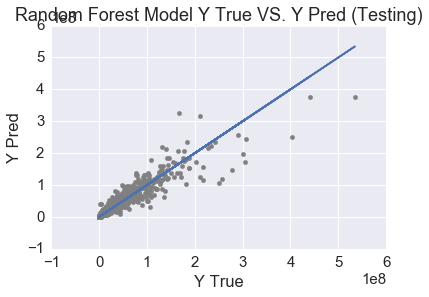

In [464]:
plt.scatter(y_test, y_test_pred, color='gray')
plt.plot(y_test, y_test)
plt.title("Random Forest Model Y True VS. Y Pred (Testing)")
plt.xlabel("Y True")
plt.ylabel("Y Pred")

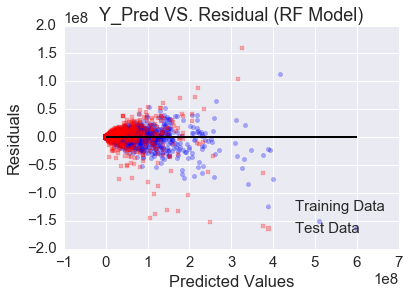

In [465]:
plt.scatter(y_train_pred, y_train_pred - y_train, color="b", marker="o", label="Training Data", alpha=0.3)
plt.scatter(y_test_pred, y_test_pred - y_test, color="r", marker="s", label="Test Data", alpha=0.3)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="lower right")
plt.hlines(y=0, xmin=0, xmax=600000000, lw=2, color="k")
plt.title("Y_Pred VS. Residual (RF Model)")